In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
 
data = pd.read_csv("mobile_price_range_data.csv")


In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
x=data.iloc[:,:-1].values

In [7]:
y=data.iloc[:,-1].values

In [8]:
x

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [9]:
y

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [11]:
print(y_train.shape)

(1500,)


In [12]:
print(X_test.shape)

(500, 20)


In [13]:
print(X_train.shape)

(1500, 20)


In [14]:
print(y_test.shape)

(500,)


## decision tree


In [15]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [16]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
Y_pred = dt.predict(X_test)

In [18]:
Y_pred

array([0, 1, 1, 0, 3, 1, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 2, 3, 1, 2, 3, 2, 2, 2, 1, 3, 0, 3, 3, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 2, 3, 1, 3, 1, 3, 1, 3, 3, 1, 0, 3, 1, 3, 2, 1,
       0, 2, 3, 2, 1, 1, 0, 3, 3, 0, 1, 1, 1, 0, 0, 3, 2, 2, 3, 2, 3, 1,
       2, 1, 3, 0, 1, 1, 1, 3, 3, 0, 3, 3, 3, 3, 0, 2, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 2, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 1, 2, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 3, 1, 3, 1, 3, 2, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 3, 0, 3, 0, 0, 2, 3, 3, 1, 2, 1, 2, 3, 2, 3, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 3, 1,
       0, 1, 2, 2, 3, 3, 1, 3, 1, 0, 1, 1, 3, 3, 2, 1, 0, 2, 3, 2, 3, 2,
       1, 2, 0, 1, 2, 0, 3, 3, 3, 1, 2, 2, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 2, 3, 3, 0, 1, 1, 3, 3, 2, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 1, 0, 1, 3, 3, 2, 2,

In [19]:
print('training score',dt.score(X_train,y_train))

training score 1.0


In [20]:
print('testing score',dt.score(X_test,y_test))

testing score 0.82


In [21]:
cm=confusion_matrix(y_test,Y_pred)
print(cm)

[[102  14   0   0]
 [  8  97  21   0]
 [  0  20  98  17]
 [  0   0  10 113]]


In [22]:
dt_ac=accuracy_score(y_test,Y_pred)

In [23]:
dt_ac

0.82

# # knn

In [24]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std =std.fit_transform(X_train)

X_test_std =std.transform(X_test)

In [25]:
X_train_std

array([[ 0.15991206,  0.99600797,  1.32943092, ..., -1.74445599,
        -1.01342342, -1.00803226],
       [-0.58714782,  0.99600797,  0.34962678, ...,  0.57324462,
        -1.01342342,  0.99203175],
       [-0.03716508, -1.00400803, -1.24255495, ..., -1.74445599,
        -1.01342342,  0.99203175],
       ...,
       [-1.20817   ,  0.99600797,  0.10467574, ...,  0.57324462,
         0.98675438,  0.99203175],
       [ 0.63656377,  0.99600797,  0.34962678, ...,  0.57324462,
         0.98675438, -1.00803226],
       [ 0.63427218,  0.99600797, -0.99760392, ...,  0.57324462,
        -1.01342342,  0.99203175]])

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [27]:
knn.fit(X_train_std,y_train)

KNeighborsClassifier()

In [28]:
Y_predt=knn.predict(X_test_std)

In [29]:
Y_predt

array([0, 1, 1, 0, 1, 1, 0, 2, 1, 3, 0, 3, 2, 0, 2, 0, 1, 1, 1, 2, 1, 2,
       1, 3, 3, 2, 2, 1, 1, 2, 1, 1, 2, 0, 3, 1, 0, 0, 1, 1, 0, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 0, 1, 0, 2, 2, 3, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       1, 2, 2, 2, 1, 3, 0, 3, 3, 1, 3, 0, 1, 0, 0, 3, 2, 1, 3, 2, 2, 0,
       2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 1, 2, 3, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 3, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 3, 1, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 3, 0, 0, 2, 0, 1, 0, 0, 2, 3, 1, 0,
       0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 3, 0, 3, 2, 3, 2, 1, 0, 1, 0, 1, 3,
       2, 0, 0, 3, 0, 3, 0, 2, 1, 3, 3, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 3,
       2, 0, 3, 2, 0, 3, 2, 0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 3, 1,
       2, 2, 2, 2, 2, 1, 0, 3, 2, 1, 0, 1, 3, 3, 1, 1, 0, 1, 2, 0, 3, 2,
       1, 0, 0, 2, 1, 0, 3, 2, 2, 0, 0, 1, 1, 3, 1, 2, 1, 0, 1, 0, 1, 2,
       2, 2, 2, 0, 1, 0, 3, 0, 1, 2, 2, 3, 0, 1, 1, 2, 3, 1, 1, 0, 2, 1,
       1, 2, 0, 0, 1, 3, 1, 3, 0, 0, 2, 3, 3, 3, 0,

In [30]:
print('training score',knn.score(X_train,y_train))

training score 0.25133333333333335


In [31]:
print('testing score',dt.score(X_test,y_test))

testing score 0.82


In [32]:
cm1=confusion_matrix(y_test,Y_predt)
print(cm1)

[[83 29  4  0]
 [43 48 31  4]
 [18 40 59 18]
 [ 0 21 41 61]]


In [33]:
knn_ac=accuracy_score(y_test,Y_predt)

In [34]:
knn_ac

0.502

# logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [36]:
lr.fit(X_train_std,y_train)

LogisticRegression()

In [37]:
Y_pre=lr.predict(X_test_std)

In [38]:
Y_pre

array([0, 0, 1, 1, 2, 2, 0, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 0, 0, 2, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 2, 3, 1, 3, 1, 3, 1, 2, 3, 1, 0, 2, 0, 3, 2, 1,
       1, 2, 3, 2, 1, 2, 0, 3, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 0,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 3, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 1, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 3, 3, 2, 1,
       0, 2, 1, 0, 3, 1, 3, 1, 2, 2, 3, 1, 2, 2, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3, 1, 2, 1, 2, 3, 2, 2, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 3, 2, 0, 2, 0, 1, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 3, 2, 3, 2,
       2, 1, 0, 1, 3, 0, 3, 3, 3, 1, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 3, 2, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 2, 2,

In [39]:
print('training score',lr.score(X_train,y_train))

training score 0.25133333333333335


In [40]:
print('testing score',lr.score(X_test,y_test))

testing score 0.246


In [41]:
cm3=confusion_matrix(y_test,Y_pre)
print(cm3)

[[115   1   0   0]
 [  5 114   7   0]
 [  0   5 126   4]
 [  0   0   5 118]]


In [42]:
lr_ac=accuracy_score(y_test,Y_pred)

In [43]:
lr_ac

0.82

In [44]:
pickle.dump(lr, open('model.pkl', 'wb'))

model=pickle.load(open('model.pkl', 'wb'))

# random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")   

In [46]:
classifier.fit(X_train_std,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [47]:
Y_pr=classifier.predict(X_test_std)

In [48]:
Y_pr

array([0, 0, 1, 0, 2, 2, 0, 2, 3, 3, 0, 3, 0, 0, 3, 0, 0, 1, 1, 2, 3, 3,
       0, 2, 3, 2, 2, 3, 2, 2, 1, 1, 2, 0, 3, 3, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 3, 1, 3, 2, 3, 1, 2, 3, 0, 0, 2, 1, 3, 2, 2,
       1, 2, 3, 2, 1, 2, 0, 3, 3, 1, 2, 2, 0, 0, 0, 3, 1, 2, 3, 2, 2, 0,
       2, 0, 3, 0, 0, 1, 1, 3, 3, 0, 3, 3, 3, 2, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 0, 1, 2, 2, 3, 1, 1, 1, 2, 0, 0, 0, 3, 0, 1, 1, 1, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 2, 3, 2, 1,
       0, 1, 1, 0, 3, 1, 3, 1, 2, 2, 2, 1, 2, 0, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 0, 2, 0, 3, 1, 0, 2, 3, 3, 1, 2, 2, 2, 3, 2, 3, 1, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1,
       0, 0, 2, 1, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 3, 1, 3, 2,
       1, 1, 0, 1, 2, 0, 3, 3, 3, 1, 2, 1, 0, 1, 0, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 3, 0, 3, 2, 2, 1, 0, 1, 2, 3, 0, 1, 2, 3, 3, 1, 1, 2, 2, 0,
       0, 2, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 2, 1,

In [49]:
print('training score',classifier.score(X_train,y_train))

training score 0.25133333333333335


In [50]:
print('testing score',classifier.score(X_test,y_test))

testing score 0.246


In [51]:
cm4=confusion_matrix(y_test,Y_pr)
print(cm4)

[[109   7   0   0]
 [ 20  88  18   0]
 [  2  21 102  10]
 [  0   0  18 105]]


In [52]:
classifier_ac=accuracy_score(y_test,Y_pr)

In [53]:
classifier_ac

0.808

# #COMPARING ALL ALGORITHMS

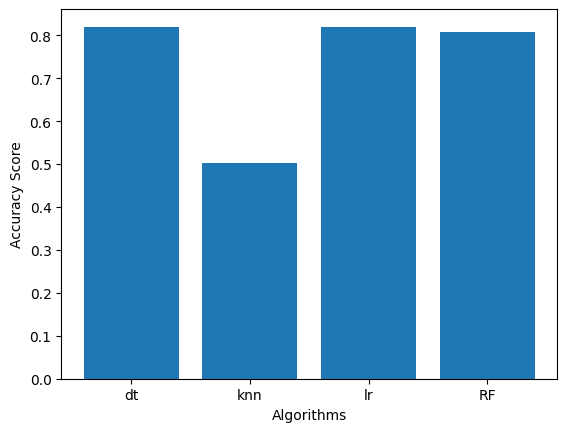

In [54]:
plt.bar(x=['dt','knn','lr','RF'],height=[dt_ac,knn_ac,lr_ac,classifier_ac])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()